In [13]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np

# Load dataset
file_path = "D:/dm_assignment/datasets/kmeans.csv" 
df = pd.read_csv(file_path)

# Features for clustering
X = df[['Area', 'Perimeter', 'Compactness']]

In [ ]:
# Features (2D visualization)
X = df[['Area', 'Perimeter', 'Compactness']].values

# Apply KMeans
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
df['Cluster'] = kmeans.fit_predict(X)

print("Cluster Centers:")
print(kmeans.cluster_centers_)
print("\nClustered Data:")
print(df)

Cluster Centers:
[[14.3475   14.2025    0.895675]
 [15.26     18.84      0.871   ]
 [16.14     14.99      0.9034  ]]

Clustered Data:
    Area  Perimeter  Compactness  Cluster
0  15.26      18.84       0.8710        1
1  14.88      14.57       0.8871        0
2  14.29      14.09       0.9050        0
3  13.84      13.94       0.8955        0
4  16.14      14.99       0.9034        2
5  14.38      14.21       0.8951        0


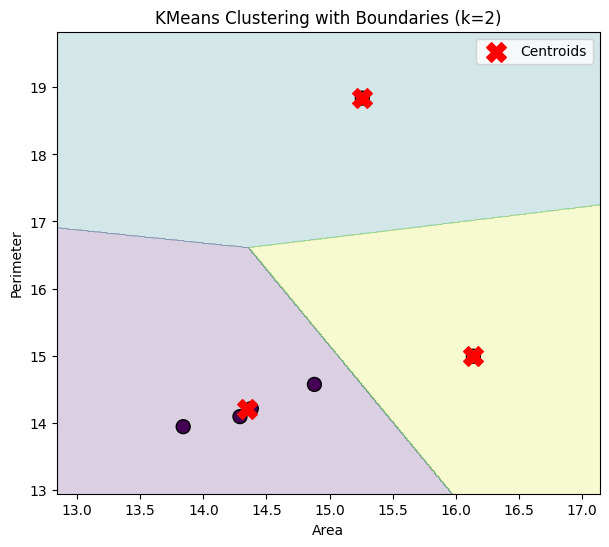

In [ ]:
# Plot decision boundaries
h = 0.01  # step size in the mesh
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(7,6))
plt.contourf(xx, yy, Z, alpha=0.2, cmap='viridis')  # soft cluster regions

# Plot data points
plt.scatter(X[:, 0], X[:, 1], c=df['Cluster'], cmap='viridis', s=100, edgecolors='k')

# Plot centroids
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], 
            marker='X', s=200, c='red', label='Centroids')

plt.xlabel("Area")
plt.ylabel("Perimeter")
plt.title("KMeans Clustering with Boundaries")
plt.legend()
plt.show()